# Final Project Submission

Please fill out:
* Student name: Austin Towery
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. This analysis will explore what types of films are currently doing the best at the box office. Using that analysis I will translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Setup

In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os,glob
import string

In [3]:
# Create folder for data files
folder = 'zippedData/'

In [4]:
# use os to list files in folder
os.listdir(folder)

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [5]:
# Glob is creating a search string that searches in folder for any file type 
# That starts with csv but can have anything after

files = glob.glob(f"{folder}*.csv*")
files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [6]:
# Make file names more variable friendly

# Take file name, replace .csv.gz, split it along slashes, then take the last
# Item after split and swap '.' for '_'

files[0].replace('zippedData\\','').replace('.csv.gz','').split('/')[-1].replace('.','_')

'bom_movie_gross'

In [7]:
#Load files into dict using filename as their key

tables = {}
dashes = '---'*25

for file in files:
    # Save a variable-friendly version of file name
    table_name = file.replace('zippedData\\',''
                             ).replace('.csv.gz',''
                             ).split('/')[-1].replace('.','_')
    print(dashes)
    
    # Load and preview dataframe
    print(f'Preview of {table_name}')
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()
    
    
# Source: james movie url

---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Possible Approaches

* Using the provided csv's and merging dataframes with:
    * regular pandas
    * pandasql
* Using the provided csv's and creating your own SQL database (using sqlite)
* Sourcing your own dataset using Web Scraping
* Sourcing your own dataset using an API
* Using 1 of the provided csv's and supplementing it with addtional data from an API

### If I'm feeling behind

* Focus on these three tables
    * imdb.title.basics
    * imdb.title.ratings
    * bom.movie_gross

## Using the Provided Data - Join with Pandas

* **Questions to Consider:**
    1. Where is the financial data?
    2. What columns are primary keys/unique indices?
    3. What tables could I join on what columns?

# Questions I want to Answer

1. What is the relationship between movie length and box office success?  Is there an ideal length range?
2. What are the top 2-3 genres that have the most consistent success?
3. What is the correlation between how many movies a director or writer has worked on and the success of those movies?

## What are the 3 genres that have the most consistent success?

To do this I will make a a table of movie titles, their grosses, and associated genres.  From there I will get the total and average grosses for each genre over a certain time frame and compare them.  Depending on results, I might divide these results into different buckets of time frames to see if more recent trends point towards specific genres.

### Data Preperation

In [8]:
# print out an quick overview of the table options to see what to explore
for key in tables.keys():
    print(key)

bom_movie_gross
imdb_name_basics
imdb_title_akas
imdb_title_basics
imdb_title_crew
imdb_title_principals
imdb_title_ratings
tmdb_movies
tn_movie_budgets


>From the preview above it looks like `imdb_title_basics`, `tn_movie_budgets`, and `bom_movie gross` all have relevant information about grosses and genres associated with movies.

>Next step is to investigate each dataset further to see the best way to use them.

In [9]:
# create dataframe for each table and preview
df_tn_movie_budgets = tables['tn_movie_budgets']
print('***TN_MOVIE_BUDGET DATASET***')
display(df_tn_movie_budgets.head())

print(dashes)
print('\n')

df_imdb_title_basics = tables['imdb_title_basics']
print('***IMDB_TITLE_BASICS DATASET***')
display(df_imdb_title_basics.head())

print(dashes)
print('\n')

df_bom_movie_gross = tables['bom_movie_gross']
print('***BOM_MOVIE_GROSS DATASET***')
display(df_bom_movie_gross.head())



***TN_MOVIE_BUDGET DATASET***


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


---------------------------------------------------------------------------


***IMDB_TITLE_BASICS DATASET***


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


---------------------------------------------------------------------------


***BOM_MOVIE_GROSS DATASET***


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# display preview of information about each datasets' values
print(df_bom_movie_gross.info())
print('\n')
print(dashes)
print(df_imdb_title_basics.info())
print('\n')
print(dashes)
print(df_tn_movie_budgets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  f

In [11]:
# create function to display df info with format above
def display_df_info(df):
    print('***BOM_MOVIE_GROSS DATASET***')
    print(df.info())
    print('\n')
    print(dashes)

>There are quite a lot more entries in `imdb's` movie title database.  `bom's` dataset is much smaller than `tn's` and there are also a lot of missing values in it.

>`imdb's` and `tn's` datasets seem like a good place to start.

In [12]:
# redisplay the tables to be merged
print('***TN_MOVIE_BUDGET DATASET***')
display(df_tn_movie_budgets.head())

print('***IMDB_TITLE_BASICS DATASET***')
display(df_imdb_title_basics.head())

***TN_MOVIE_BUDGET DATASET***


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


***IMDB_TITLE_BASICS DATASET***


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
# create lists for each datasets movie title column as lower case and preview

# create list of tn's movie title column as lower case
tn_title_list = []
for title in df_tn_movie_budgets['movie']:
    tn_title_list.append(title.lower())

# create list of imdb's primary title column as lower case
imdb_primary_title_list = []
for title in df_imdb_title_basics['primary_title']:
    imdb_primary_title_list.append(title.lower())
    
# create list of imdb's original title column as lower case
imdb_original_title_list = []
for title in df_imdb_title_basics['original_title']:
    imdb_original_title_list.append(str(title).lower())

# preview first five titles in each list
print(tn_title_list[:5])
print(imdb_primary_title_list[:5])
print(imdb_original_title_list[:5])

['avatar', 'pirates of the caribbean: on stranger tides', 'dark phoenix', 'avengers: age of ultron', 'star wars ep. viii: the last jedi']
['sunghursh', 'one day before the rainy season', 'the other side of the wind', 'sabse bada sukh', 'the wandering soap opera']
['sunghursh', 'ashad ka ek din', 'the other side of the wind', 'sabse bada sukh', 'la telenovela errante']


In [14]:
def clean_title(text):
    import string
    # remove punctuation and extra spaces, make all letters lower case, and
    #
    for p in string.punctuation:
        text = text.replace(p,'')
    
    text_list = text.strip().lower().split()
    new_text = ' '.join(text_list)
    
    # return new list
    return new_text

In [15]:
def clean_and_split(text):
    import string
    # remove punctuation and extra spaces, make all letter lower case,
    # and split title into list
    for p in string.punctuation:
        text = text.replace(p,'')
    text_list = text.strip().lower().split()
    # return new list
    return text_list

In [16]:
# create function to compare a list of titles to both title comlumns in imdb's dataset

def imdb_title_comparison(title_list):
    # create dictionary to return and lists that it will contain
    t_dict = {}
    t_not_found = []
    t_in_pt = []
    t_in_ot = []

    # check each title in title_list passed to function column to see if it 
    # matches one of the title columns in imdb's dataset
    for title in title_list:
        # check if title is in primary or original title list, if so add it to respective list
        c_title = clean_title(title)
        if title.lower() in imdb_primary_title_list:
            t_in_pt.append(title.lower())
        elif title.lower() in imdb_original_title_list:
            t_in_ot.append(title.lower())
        # if not found in either add title to list of ones not found
        else:
            t_not_found.append(title.lower())
    
    # add to dict that will return all three lists
    t_dict['not_found'] = t_not_found
    t_dict['pt_titles'] = t_in_pt
    t_dict['ot_titles'] = t_in_ot
    
    # print length of each list and a preview of titles for each
    print('Primary titles found:')
    print(f'{len(t_in_pt)} titles found in primary titles')
    print(t_in_pt[:10],'\n')

    print('Original titles found:')
    print(f'{len(t_in_ot)} titles found in original titles')
    print(t_in_ot[:10],'\n')

    print('Titles not found in either:')   
    print(f'{len(t_not_found)} titles not found in either column')
    print(t_not_found[:10],'\n')
    
    # print out keys for t_dict
    print('t_dict keys: not_found, pt_titles, ot_titles')
    
    return t_dict

In [17]:
# run function on tn_title_list
tn_title_comparison = imdb_title_comparison(tn_title_list)

# unpack dictionary values into individual lists to work with
titles_not_found = tn_title_comparison['not_found']
titles_in_pt = tn_title_comparison['pt_titles']
titles_in_ot = tn_title_comparison['ot_titles']

Primary titles found:
2432 titles found in primary titles
['avatar', 'pirates of the caribbean: on stranger tides', 'dark phoenix', 'avengers: age of ultron', 'avengers: infinity war', 'justice league', 'spectre', 'the dark knight rises', 'solo: a star wars story', 'the lone ranger'] 

Original titles found:
57 titles found in original titles
['renegades', 'tian jiang xiong shi', 'maze runner: the death cure', 'mei ren yu', 'zhuo yao ji', 'yi dai zong shi', 'switchback', 'yip man 3', 'nanny mcphee and the big bang', 'konferenz der tiere'] 

Titles not found in either:
3293 titles not found in either column
['star wars ep. viii: the last jedi', 'star wars ep. vii: the force awakens', 'pirates of the caribbean: at worldâ\x80\x99s end', 'spider-man 3', 'harry potter and the half-blood prince', 'superman returns', 'quantum of solace', 'pirates of the caribbean: dead manâ\x80\x99s chest', 'the chronicles of narnia: prince caspian', 'transformers: revenge of the fallen'] 

t_dict keys: not_f

>It looks like some of the titles from `tn's_movie_budgets` didn't get imported cleanly from the **\x80\x90s** in the pirates at world's end title as well as the other pirates title.

>The other titles not found seem to be sequels who's numbering or naming convention could be causing an issue. 

>First I will look at the titles containing extra characters.

In [18]:
# make a list of all titles containing text artifact
misread_titles = []
for title in titles_not_found:
    if "â" in title:
        misread_titles.append(title)

# preview how many total titles there are with this artifact
print(f'There are {len(misread_titles)} misread titles\n')
# preview first 10 and last 10 to see if the unwanted text is the same
first_ten = misread_titles[:10]
print(first_ten)
print('\n')
last_ten = misread_titles[-10:]
print(last_ten)

There are 73 misread titles

['pirates of the caribbean: at worldâ\x80\x99s end', 'pirates of the caribbean: dead manâ\x80\x99s chest', 'disneyâ\x80\x99s a christmas carol', 'mission: impossibleâ\x80\x94fallout', 'mission: impossibleâ\x80\x94rogue nation', 'mission: impossibleâ\x80\x94ghost protocol', 'harry potter and the sorcererâ\x80\x99s stone', 'assassinâ\x80\x99s creed', 'the huntsman: winterâ\x80\x99s war', 'miss peregrineâ\x80\x99s home for peculiar children']


['donâ\x80\x99t think twice', '2016: obamaâ\x80\x99s america', 'the legend of hellâ\x80\x99s gate: an american conspiracy', 'beginnerâ\x80\x99s guide to sex', 'the kingâ\x80\x99s thief', 'iâ\x80\x99m not ashamed', 'godâ\x80\x99s not dead', 'the helixâ\x80¦loaded', 'antarctic edge: 70âº south', "i love you â\x80¦ don't touch me!"]


In [19]:
# create function for checking list for any unfixed titles
def check_misread_titles(title_list):
    misread_titles = []
    # create list of misread_titles
    for title in title_list:
        if 'â' in title:
            misread_titles.append(title)
    
    # preview how many total titles there are with this artifact
    print(f'There are {len(misread_titles)} misread titles\n')
    # preview any misread titles left
    print(misread_titles)
    
    return misread_titles

>Looks like there are multiple versions of the unwanted text.  Next I will get a list of each unwanted text variant then replace them.

In [20]:
# create unique set of artifact variants
unwanted_text_variants = []

for title in misread_titles:
    # partition title at beginning of artifact text
    part_title = title.partition('â')
    
    # split last element of partition and select the first element
    split_part = part_title[-1].split()[0]
    
    # add 'â' back to artifact and append to unwanted variants list
    artifact = 'â' + split_part
    unwanted_text_variants.append(artifact)
    
unwanted_set = set(unwanted_text_variants)
unwanted_set

{'â\x80\x93',
 'â\x80\x94',
 'â\x80\x94fallout',
 'â\x80\x94ghost',
 'â\x80\x94rogue',
 'â\x80\x99',
 'â\x80\x99amore',
 'â\x80\x99m',
 'â\x80\x99os',
 'â\x80\x99s',
 'â\x80\x99t',
 'â\x80¦',
 'â\x80¦loaded',
 'âº',
 'â½:'}

In [21]:
# create list of artifacts that mean seperate things
misc_artifacts = []
for title in misread_titles:
    if 'â\x80¦' in title:
        misc_artifacts.append(title)
    
misc_artifacts

['when harry met sallyâ\x80¦',
 '28 days laterâ\x80¦',
 'the helixâ\x80¦loaded',
 "i love you â\x80¦ don't touch me!"]

In [22]:
# create function for making list of misc artifacts
def artifact_list(title_list):
    misc_artifacts = []
    for title in misread_titles:
        if 'â\x80¦' in title:
            misc_artifacts.append(title)
    
    return misc_artifacts

In [23]:
# check if any misc titles are actually in imdb's list

for title in imdb_primary_title_list:
    if 'when harry met sally' in title:
        print(title)
    elif '28 days later' in title:
        print(title)
    elif 'the helix' in title:
        print(title)
    elif 'touch me!' in title:
        print(title)

print('\n' + dashes + '\n')

for title in imdb_original_title_list:
    if 'when harry met sally' in title:
        print(title)
    elif '28 days later' in title:
        print(title)
    elif 'the helix' in title:
        print(title)
    elif 'touch me!' in title:
        print(title)


---------------------------------------------------------------------------



>These titles have various symbols causing the `'¦'` vertical broken bar.  Since they don't appear to be in the `imdb` title list anyway we can just ignore them.

In [24]:
def replace_artifact(text):
    if 'â\x80\x93' in text:
        text = text.replace('â\x80\x93', "-")   
    elif 'â\x80\x94' in text:
        text = text.replace('â\x80\x94', "-")
    elif 'â\x80\x99' in text:
        text = text.replace('â\x80\x99', "'") 
    elif 'âº' in text:
        text = text.replace('âº', '')
    elif 'â½' in text:
        text = text.replace('â½', '') 
    return text

In [25]:
def fix_artifact_titles(title_list):
    
    fixed_titles = []
    misc_artifacts = artifact_list(title_list)
    
    for title in title_list:
        if 'â' in title:
            if title in misc_artifacts:
                fixed_titles.append(title)
            else:
                rep_title = replace_artifact(title)
                fixed_titles.append(rep_title)
        else:
            fixed_titles.append(title)
    
    # check fixed list for any 
    check_misread_titles(fixed_titles)
    
    return fixed_titles

In [26]:
fixed_titles_not_found = fix_artifact_titles(titles_not_found)
fixed_titles_not_found

There are 4 misread titles

['when harry met sallyâ\x80¦', '28 days laterâ\x80¦', 'the helixâ\x80¦loaded', "i love you â\x80¦ don't touch me!"]


['star wars ep. viii: the last jedi',
 'star wars ep. vii: the force awakens',
 "pirates of the caribbean: at world's end",
 'spider-man 3',
 'harry potter and the half-blood prince',
 'superman returns',
 'quantum of solace',
 "pirates of the caribbean: dead man's chest",
 'the chronicles of narnia: prince caspian',
 'transformers: revenge of the fallen',
 'x-men: the last stand',
 'the golden compass',
 'guardians of the galaxy vol 2',
 'spider-man 2',
 '2012',
 'terminator salvation',
 'prince of persia: sands of time',
 "disney's a christmas carol",
 'the dark knight',
 'indiana jones and the kingdom of the crystal skull',
 'the chronicles of narnia: the lion, the witch and the wardrobe',
 'wall-e',
 'rush hour 3',
 'mission: impossible-fallout',
 'up',
 'monsters vs. aliens',
 'g.i. joe: the rise of cobra',
 'wild wild west',
 'the mummy: tomb of the dragon emperor',
 'evan almighty',
 'waterworld',
 'the polar express',
 'terminator 3: rise of the machines',
 'van helsing',
 'cow

In [27]:
imdb_title_comparison(fixed_titles_not_found)

Primary titles found:
35 titles found in primary titles
["assassin's creed", "the huntsman: winter's war", "miss peregrine's home for peculiar children", "it's complicated", "legends of oz: dorothy's return", "pete's dragon", "a dog's way home", "winter's tale", "daddy's home", "the girl in the spider's web"] 

Original titles found:
3 titles found in original titles
["tyler perry's boo 2! a madea halloween", "de rouille et d'os", "beginner's guide to sex"] 

Titles not found in either:
3255 titles not found in either column
['star wars ep. viii: the last jedi', 'star wars ep. vii: the force awakens', "pirates of the caribbean: at world's end", 'spider-man 3', 'harry potter and the half-blood prince', 'superman returns', 'quantum of solace', "pirates of the caribbean: dead man's chest", 'the chronicles of narnia: prince caspian', 'transformers: revenge of the fallen'] 

t_dict keys: not_found, pt_titles, ot_titles


{'not_found': ['star wars ep. viii: the last jedi',
  'star wars ep. vii: the force awakens',
  "pirates of the caribbean: at world's end",
  'spider-man 3',
  'harry potter and the half-blood prince',
  'superman returns',
  'quantum of solace',
  "pirates of the caribbean: dead man's chest",
  'the chronicles of narnia: prince caspian',
  'transformers: revenge of the fallen',
  'x-men: the last stand',
  'the golden compass',
  'guardians of the galaxy vol 2',
  'spider-man 2',
  '2012',
  'terminator salvation',
  'prince of persia: sands of time',
  "disney's a christmas carol",
  'the dark knight',
  'indiana jones and the kingdom of the crystal skull',
  'the chronicles of narnia: the lion, the witch and the wardrobe',
  'wall-e',
  'rush hour 3',
  'mission: impossible-fallout',
  'up',
  'monsters vs. aliens',
  'g.i. joe: the rise of cobra',
  'wild wild west',
  'the mummy: tomb of the dragon emperor',
  'evan almighty',
  'waterworld',
  'the polar express',
  'terminator 3

>Looks like there are still 3521 titles that couldn't be found

In [28]:
pc_tn_title_list = fix_artifact_titles(tn_title_list)

There are 4 misread titles

['when harry met sallyâ\x80¦', '28 days laterâ\x80¦', 'the helixâ\x80¦loaded', "i love you â\x80¦ don't touch me!"]


In [29]:
# make new tn dataframe with partially clean movie titles
df_tn_movie_budgets['movie'] = pc_tn_title_list
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [30]:
tn_cleaned = []

for title in pc_tn_title_list:
    c_title = clean_title(title)
    tn_cleaned.append(c_title)

imdb_primary_cleaned = []

for title in imdb_primary_title_list:
    c_title = clean_title(title)
    imdb_primary_cleaned.append(c_title)
    
imdb_original_cleaned = []

for title in imdb_original_title_list:
    c_title = clean_title(title)
    imdb_original_cleaned.append(c_title)
    


In [31]:
def imdb_cleaned_title_comparison(title_list):
    # create dictionary to return and lists that it will contain
    t_dict = {}
    t_not_found = []
    t_in_pt = []
    t_in_ot = []

    # check each title in title_list passed to function column to see if it 
    # matches one of the title columns in imdb's dataset
    for title in title_list:
        # check if title is in primary or original title list, if so add it to respective list
        c_title = clean_title(title)
        if c_title in imdb_primary_cleaned:
            t_in_pt.append(title.lower())
        elif c_title in imdb_original_cleaned:
            t_in_ot.append(title.lower())
        # if not found in either add title to list of ones not found
        else:
            t_not_found.append(c_title)
    
    # add to dict that will return all three lists
    t_dict['not_found'] = t_not_found
    t_dict['pt_titles'] = t_in_pt
    t_dict['ot_titles'] = t_in_ot
    
    # print length of each list and a preview of titles for each
    print('Primary titles found:')
    print(f'{len(t_in_pt)} titles found in primary titles')
    print(t_in_pt[:10],'\n')

    print('Original titles found:')
    print(f'{len(t_in_ot)} titles found in original titles')
    print(t_in_ot[:10],'\n')

    print('Titles not found in either:')   
    print(f'{len(t_not_found)} titles not found in either column')
    print(t_not_found[:10],'\n')
    
    # print out keys for t_dict
    print('t_dict keys: not_found, pt_titles, ot_titles')
    
    return t_dict

In [32]:
tn_cleaned_dict = imdb_cleaned_title_comparison(tn_cleaned)
tn_cleaned_nf = tn_cleaned_dict['not_found']

Primary titles found:
2512 titles found in primary titles
['avatar', 'pirates of the caribbean on stranger tides', 'dark phoenix', 'avengers age of ultron', 'avengers infinity war', 'justice league', 'spectre', 'the dark knight rises', 'solo a star wars story', 'the lone ranger'] 

Original titles found:
62 titles found in original titles
['renegades', 'tian jiang xiong shi', 'maze runner the death cure', 'mei ren yu', 'zhuo yao ji', 'yi dai zong shi', 'switchback', 'yip man 3', 'nanny mcphee and the big bang', 'konferenz der tiere'] 

Titles not found in either:
3208 titles not found in either column
['star wars ep viii the last jedi', 'star wars ep vii the force awakens', 'pirates of the caribbean at worlds end', 'spiderman 3', 'harry potter and the halfblood prince', 'superman returns', 'quantum of solace', 'pirates of the caribbean dead mans chest', 'the chronicles of narnia prince caspian', 'transformers revenge of the fallen'] 

t_dict keys: not_found, pt_titles, ot_titles


In [33]:
tn_pt_cleaned_found = sorted(tn_cleaned_dict['pt_titles'])
print(len(tn_pt_cleaned_found))

tn_pt_cleaned_found[:5]

2512


['10 cloverfield lane',
 '10 days in a madhouse',
 '12 rounds',
 '12 strong',
 '12 years a slave']

In [34]:
df_c_imdb_titles = df_imdb_title_basics
df_c_imdb_titles['primary_title'] = imdb_primary_cleaned
df_c_imdb_titles['original_title'] = imdb_original_cleaned
df_c_imdb_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
df_genre_grosses = df_tn_movie_budgets
df_genre_grosses['movie'] = tn_cleaned
df_genre_grosses.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star wars ep viii the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [36]:
# change column name so that the two dataframes can be mergred with movie titles
df_to_merge = df_c_imdb_titles.rename(columns={'primary_title': 'movie'})
df_to_merge.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy"


In [37]:
# merge data frames on column 'movie'
df_genre_grosses_merged = df_genre_grosses.merge(df_to_merge, how='left', on='movie')
df_genre_grosses_merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,pirates of the caribbean on stranger tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,dark phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,avengers age of ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",star wars ep viii the last jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN


In [38]:
# drop unnecessary columns
df_genre_grosses_merged.drop(['tconst', 'runtime_minutes', 'start_year', 'original_title'], 
               axis=1, inplace=True)
df_genre_grosses_merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",star wars ep viii the last jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN


In [39]:
df_genre_grosses_merged = df_genre_grosses_merged.dropna(how='any')
df_genre_grosses_merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",avengers infinity war,"$300,000,000","$678,815,482","$2,048,134,200","Action,Adventure,Sci-Fi"


In [40]:
df_genre_grosses_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 7313
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3970 non-null   int64 
 1   release_date       3970 non-null   object
 2   movie              3970 non-null   object
 3   production_budget  3970 non-null   object
 4   domestic_gross     3970 non-null   object
 5   worldwide_gross    3970 non-null   object
 6   genres             3970 non-null   object
dtypes: int64(1), object(6)
memory usage: 248.1+ KB


In [41]:
df_genre_grosses_merged['genres'].str.contains('Action')

0       False
1        True
2        True
3        True
6        True
        ...  
7298    False
7299    False
7305    False
7310    False
7313    False
Name: genres, Length: 3970, dtype: bool

In [42]:
df_genre_grosses_merged['Genres'] = df_genre_grosses_merged['genres'].str.split(',')

In [43]:
df_genre_grosses_merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,Genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,[Horror]
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",avengers infinity war,"$300,000,000","$678,815,482","$2,048,134,200","Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


### Analysis

In [44]:
# for titles with multiple genres, create new row with the title and each genre 
# associated with it
df_genre_exploded = df_genre_grosses_merged.explode('Genres')
df_genre_exploded.head()

In [45]:
# remove commas and doller signs from string to prepare to convert to int
df_genre_exploded['worldwide_gross'] = df_genre_exploded['worldwide_gross'].map(
                                                    lambda x: x.replace(',', ''))
df_genre_exploded['worldwide_gross'] = df_genre_exploded['worldwide_gross'].map(
                                                    lambda x: x.replace('$', ''))
df_genre_exploded.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,Genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625",$2776345279,Horror,Horror
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875",$1045663875,"Action,Adventure,Fantasy",Action
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875",$1045663875,"Action,Adventure,Fantasy",Adventure
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875",$1045663875,"Action,Adventure,Fantasy",Fantasy
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350",$149762350,"Action,Adventure,Sci-Fi",Action


In [84]:
# convert worldwide_grosses to int for analysis
df_genre_exploded = df_genre_exploded.astype({'worldwide_gross': 'int64'})

In [85]:
df_genre_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8267 entries, 0 to 7313
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 8267 non-null   int64 
 1   release_date       8267 non-null   object
 2   movie              8267 non-null   object
 3   production_budget  8267 non-null   object
 4   domestic_gross     8267 non-null   object
 5   worldwide_gross    8267 non-null   int64 
 6   genres             8267 non-null   object
 7   Genres             8267 non-null   object
dtypes: int64(2), object(6)
memory usage: 901.3+ KB


In [87]:
df_genre_exploded.groupby('Genres').sum()

,id,worldwide_gross
Genres,,
Action,37166,129963467236
Adventure,25695,144334807702
Animation,7467,45257318156
Biography,13749,18252447122
Comedy,46874,93140357568
Crime,20687,27868904571
Documentary,26561,33807374220
Drama,97178,116763129003
Family,12065,32965989007


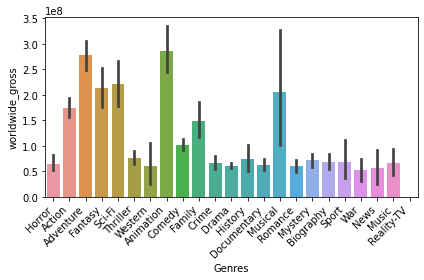

In [92]:
ax = sns.barplot(data=df_genre_exploded, x='Genres', y='worldwide_gross')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

> It looks like the three highest performing genres are Animation, Adventure, and Sci-Fi.  Animation and Adventure lead by quite a margin while third place is pretty close. with Fantasy and Musical just barely behind.

## What is the relationship between movie length and box office success? Is there an ideal length range? Does the relationship change based on genre?

To do this I will make a table of movie titles, grosses, genres, and run times. From there I'll divide the lengths into buckets and get average grosses per bucket and further divide these results into each genre.

### Data Preparation

To answer this question I'll be using:

* imdb_title_basics
* imdb_title_ratings
* tmdb_movies
* bom_movie_gross
* tn_movie_budgets

In [69]:
# create dataframe for each new dataset used and preview them with the ones
# made previously

print('***IMDB_TITLE_BASICS DATASET***')
display(df_imdb_title_basics.head())

print(dashes)

print('***TN_MOVIE_BUDGETS DATASET***')
display(df_tn_movie_budgets.head())

print(dashes)

print('***BOM_MOVIE_GROSS DATASET***')
display(df_bom_movie_gross.head())

print(dashes)

df_tmdb_movies = tables['tmdb_movies']
print('***TMDB_MOVIES DATASET***')
display(df_tmdb_movies.head())

print(dashes)

df_imdb_title_ratings = tables['imdb_title_ratings']
print('***IMDB_TITLE_RATINGS DATASET***')
display(df_imdb_title_ratings.head())



***IMDB_TITLE_BASICS DATASET***


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy"


---------------------------------------------------------------------------
***TN_MOVIE_BUDGETS DATASET***


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star wars ep viii the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


---------------------------------------------------------------------------
***BOM_MOVIE_GROSS DATASET***


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


---------------------------------------------------------------------------
***TMDB_MOVIES DATASET***


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


---------------------------------------------------------------------------
***IMDB_TITLE_RATINGS DATASET***


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


>Display info for each dataframe

In [70]:
# display info for each dataframe

display_df_info(df_imdb_title_basics)
display_df_info(df_tn_movie_budgets)
display_df_info(df_bom_movie_gross)
display_df_info(df_tmdb_movies)
display_df_info(df_imdb_title_ratings)

***BOM_MOVIE_GROSS DATASET***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


---------------------------------------------------------------------------
***BOM_MOVIE_GROSS DATASET***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie     

In [71]:
df_imdb_basics_grosses = df_imdb_title_basics
df_imdb_basics_grosses.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy"


## What is the correlation between how many movies a director or writer has worked on and the success of those movies?

To do this I will make a table of directors, how many movies they've directed, and total gross of all their movies.  From there I will find out the average gross per movie they directed and compare the results to see if more movies means more average money.  I will also use this to determine if there is a breakpoint for number of movies that indicates higher chance of success after it.

I will then do the same for writers.  Possibly comparing the two jobs afterwards.